# PyTorch
An open source machine learning framework that accelerates the path from research prototyping to production deployment.

PyTorch is a Python-based scientific computing package serving two broad purposes:

* A replacement for NumPy to use the power of GPUs and other accelerators.
* An automatic differentiation library that is useful to implement neural networks.

Resources:

* https://pytorch.org/
* https://pytorch.org/tutorials/
* https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

By the end of this lecture, you will learn:
1. what PyTorch is and why we use it. 
2. how to prepare your machine learning coding environment.
3. how to initialize and use tensors. 
4. how to use the PyTorch neural network module
5. how to use Pytorch optimizers. 

and you will also know the basic machine learning training loop with PyTorch and many other useful PyTorch modules.

## PyTorch Installation

https://pytorch.org/get-started/locally/

In [67]:
import torch

## Tensors

Tensor Initialization

In [68]:
#from a list
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [69]:
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [70]:
#from a numpy array
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [71]:
print(x_np)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [72]:
#from Tensor class
x_tnsr = torch.Tensor([ [ [1,2], [3,4] ] , [[5,6], [7,8]]  ])

In [73]:
#from another tensor
x_zeros = torch.zeros_like(x_tnsr)

In [74]:
print(x_zeros)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])


In [75]:
x_ones = torch.ones_like(x_tnsr)

In [76]:
x_rand = torch.rand_like(x_tnsr)

In [77]:
print(x_rand)

tensor([[[0.2481, 0.9522],
         [0.2634, 0.2533]],

        [[0.1196, 0.3837],
         [0.5016, 0.2646]]])


Tensor Attributes

In [78]:
print(f"Shape of tensor: {x_rand.shape}")

Shape of tensor: torch.Size([2, 2, 2])


In [79]:
print(f"Datatype of tensor: {x_rand.dtype}")

Datatype of tensor: torch.float32


In [80]:
print(f"Device tensor is stored on: {x_rand.device}")

Device tensor is stored on: cpu


In [81]:
print(x_tnsr)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [83]:
print(x_tnsr[0])

tensor([[1., 2.],
        [3., 4.]])


In [84]:
print(x_tnsr[1])

tensor([[5., 6.],
        [7., 8.]])


In [85]:
print(x_tnsr[1,0])

tensor([5., 6.])


In [86]:
print(x_tnsr[0,0,0])

tensor(1.)


Tensor Operations
https://pytorch.org/docs/stable/torch.html

In [87]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [88]:
# joining tensors
t_joint = torch.cat([tensor, tensor, tensor], dim=1)
print(t_joint)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [89]:
#multiplication
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [90]:
#matrix multiplication
print("tensor.matmul(tensor.T)",tensor.matmul(tensor.T))
# Alternative syntax:
print("tensor @ tensor.T ",  tensor @ tensor.T)

tensor.matmul(tensor.T) tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor @ tensor.T  tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [91]:
#In-place operations Operations that have a _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.

print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [92]:
# Tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [93]:
#A change in the tensor reflects in the NumPy array.

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [96]:
#NumPy array to Tensor
n = np.ones(5)
t = torch.from_numpy(n)
print(n)

[1. 1. 1. 1. 1.]


In [ ]:
#Changes in the NumPy array reflects in the tensor.

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

## Dataset and DataLoader

In [97]:
#loading a dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset

#source: https://github.com/zalandoresearch/fashion-mnist

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [98]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [102]:
len(training_data)

60000

In [100]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [103]:
img, lbl = training_data[0]

In [104]:
print(img.shape)

torch.Size([1, 28, 28])


In [105]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [106]:
len(test_data)

10000

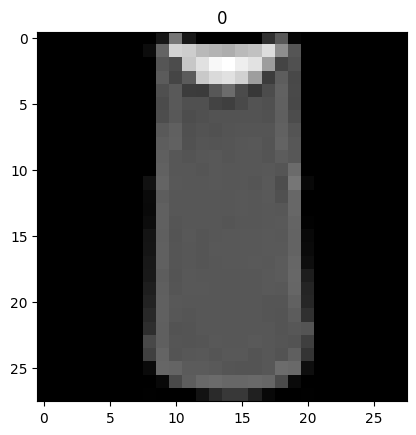

In [109]:
import matplotlib.pyplot as plt
img, label = training_data[2]
plt.title(label)
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [110]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [111]:
print(labels_map)

{0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}


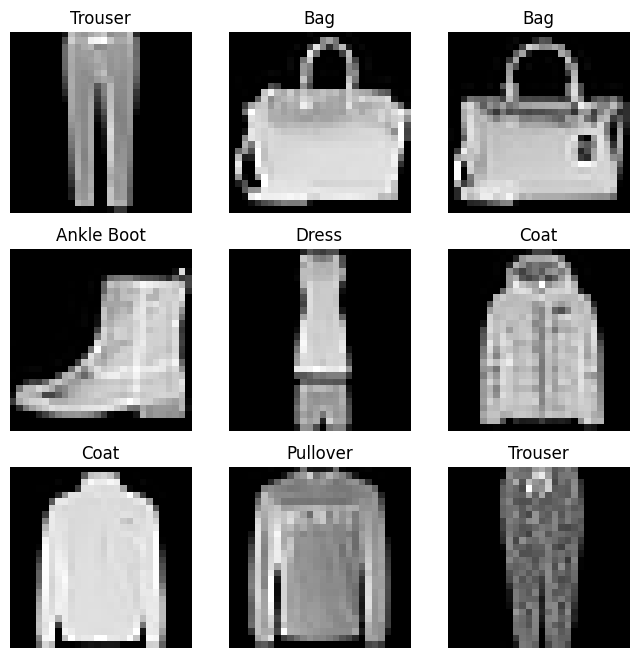

In [112]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

DataLoader to iterate in dataset

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))

In [ ]:
print("Feature batch shape: ",  train_features.shape)
print("Labels batch shape: ", train_labels.shape)

In [ ]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Building a Neural Network Model

In [ ]:
from torch import nn

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork()
print(model)